# Trellis Data

## Description

This dataframe contains the full PDO + CAF screening developed and detailed in "Cancer-Associated Fibroblasts Regulate Patient-Derived Organoid Drug Responses", 2022 (https://www.biorxiv.org/content/10.1101/2022.10.19.512668v1). 

We developed a highly multiplexed thiol-reactive organoid barcoding in situ mass cytometry (TOBis MC) platform to perform single-cell post translational modification (PTM) signalling analysis of colorectal cancer (CRC) PDOs and cancer associated fibroblasts (CAFs) in response to clinical therapies. 

The dataframe is structured in rows that correspond to each single cell, and columns that include information on the PTM or protein measured, and the metadata (information on the provenance of each cell). 

### Columns include:
* Date: in format YYYMMDD, correspond to the date those rows were acquired.
* Patient: PDO number (5, 11, 21, 23, 27, 75, 99, 109, 141, 216)
* Culture: indicates the nature (monoculture/co-culture of the sample). PDO (PDO monoculture), F (CAF monoculture), PDOF (PDO+CAF co-culture).
* Treatment: drug(s) administered to each culture. The key for the drug labels appear detailed in Table S2 in the article referenced.
* Concentration: concentration used for each treatment. The key for the drug concentrations appear detailed in Table S2 in the article referenced.
* Replicate: treatment conditions were performed in triplicate (A, B, C) and control conditions in triplicate or duplicate (A, B, C, AA, BB, CC)
* Cell_type: refers to the cell-type of the cell gated (PDOs, or CAFs). In monocultures there is one cell type, and in co-cultures 2. 
* Plate: since different treatments contain different vehicle controls (DMSO, AH, O), the plate column helps to specify which vehicle corresponds to which treatments. This is important for pairing. 
* Batch: the data was acquired along 10 months, but the acquisition was performed in 2 general batches, with 5 months in between. However, for a more accurate batch representation, we recommend using the columns "Date" and "Patient".

[download link](https://data.mendeley.com/datasets/hc8gxwks3p/1)

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [ ]:
import pickle
import os
import pandas as pd
import numpy as np
import itertools

In [ ]:
df = pd.read_pickle("data/Metadata_final_paper")
df.head()

,pHH3,RFP,mCHERRY,Vimentin,EpCAM,CK18,Pan_CK,GFP,IdU,pPDK1,...,Date,Patient,Culture,Treatment,Concentration,Replicate,Cell_type,pPKCa,Plate,Batch
0,1.444846,0.000000,0.000000,4.498622,66.200089,91.111916,161.084412,406.746246,4.811596,55.422546,...,20211119,5,PDO,O,2,B,PDOs,NaN,O,2
1,5.783943,0.056214,0.434517,0.000000,190.450790,0.000000,17.851675,0.000000,5.958662,4.794238,...,20211119,5,PDO,O,2,B,PDOs,NaN,O,2
2,1.165297,2.312362,0.357034,0.000000,266.436646,0.000000,42.965565,0.000000,0.000000,3.052261,...,20211119,5,PDO,O,2,B,PDOs,NaN,O,2
3,0.000000,0.000000,0.000000,0.000000,84.960304,30.397985,56.991665,0.000000,0.000000,15.021135,...,20211119,5,PDO,O,2,B,PDOs,NaN,O,2
4,0.498328,5.136724,0.000000,3.886348,48.076462,0.416286,30.709440,1.689452,28.263380,18.386526,...,20211119,5,PDO,O,2,B,PDOs,NaN,O,2


In [4]:
df.columns

Index(['pHH3', 'RFP', 'mCHERRY', 'Vimentin', 'EpCAM', 'CK18', 'Pan_CK', 'GFP',
       'IdU', 'pPDK1', 'cCaspase_3', 'Geminin', 'pMEK1_2', 'pNDRG',
       'pMKK4_SEK1', 'pBTK', 'pSRC', 'p4EBP1', 'pRB', 'pAKT308', 'pCREB',
       'pSMAD1_5_9', 'pAKT473', 'pNF_kB', 'pMKK3_MKK6', 'pP38', 'pMAPKAPK',
       'pAMPKa', 'pBAD', 'pHistone_H2A', 'p90RSK', 'pP120_catenin',
       'Beta_catenin_active', 'pGSK', 'pERK1_2', 'pSMAD2_3', 'PLK', 'CHGA',
       'pDNAPK', 'pS6', 'CD90', 'cPARP', 'pCHK1', 'Cyclin_B1', 'Date',
       'Patient', 'Culture', 'Treatment', 'Concentration', 'Replicate',
       'Cell_type', 'pPKCa', 'Plate', 'Batch'],
      dtype='object')

In [5]:
dictionary = {}
for c in ['Date', 'Patient', 'Culture', 'Treatment', 'Concentration', 'Replicate', 'Cell_type', 'Plate', 'Batch']:
  dictionary[c] = df[c].unique()
  print(c, dictionary[c])

Date ['20211119' '20211116' '20211125' '20211122' '20211123' '20210518'
 '20210602' '20210413' '20210330' '20210525' '20210524' '20210317'
 '20210608' '20210420' '20210427' '20210713' '20210610' '20210607'
 20220328]
Patient ['5' '11' '75' '141' '109' '27' '216' '99' '21' '23']
Culture ['PDO' 'PDOF' 'F']
Treatment ['O' 'H2O' 'S' 'VS' 'L' 'V' 'DMSO' 'F' 'AH' 'C' 'SF' 'CS' 'CF' 'CSF']
Concentration ['2' '3' '1' '0' '4']
Replicate ['B' 'C' 'A' 'BB' 'AA' 'CC']
Cell_type ['PDOs' 'Fibs']
Plate ['O' 'SLV' 'CSF']
Batch [2 1]


In Table S2, treatment 'CSF', has concentration value 5, but there is no such concentration value in the data.

In [6]:
def get_dict(dframe, names):
  out_dict = {}
  name = names[0]
  for k in dictionary[name]:
    name_df = dframe.loc[dframe[name] == k]
    if len(name_df) == 0:
      continue
    if len(names) == 1:
      out_dict[k] = name_df.index.to_numpy()
    else:
      out_dict[k] = get_dict(name_df, names[1:])
  return out_dict

dict_data = get_dict(df, ['Culture', 'Patient', 'Plate', 'Replicate', 'Treatment', 'Concentration'])

In [ ]:
def get_experiments(d, depth):
  exps = []
  for k in d.keys():
    if depth == 0:
      exps.append(d[k])
    else:
      exps = exps + get_experiments(d[k], depth-1)
  return exps

def get_dists(d):
  dists = []
  for k in d.keys():
    if type(d[k]) is np.ndarray:
      dists.append(d[k])
    else:
      dists.extend(get_dists(d[k]))
  return dists

experiments = get_experiments(dict_data, depth=2)
print(len(experiments))

90


In [8]:
experiments = get_experiments(dict_data, 2)
for i in range(len(experiments)):
  for k in experiments[i].keys():
    if len(experiments[i][k]) == 1:
      for _k in experiments[i].keys():
        print(_k, experiments[i][_k].keys())
      print('-'*50)
      break

B dict_keys(['S', 'VS', 'L', 'V', 'DMSO'])
C dict_keys(['S', 'VS', 'L', 'V', 'DMSO'])
A dict_keys(['S', 'VS', 'L', 'V', 'DMSO'])
BB dict_keys(['DMSO'])
AA dict_keys(['DMSO'])
CC dict_keys(['DMSO'])
--------------------------------------------------
B dict_keys(['S', 'VS', 'L', 'V', 'DMSO'])
C dict_keys(['S', 'VS', 'L', 'V', 'DMSO'])
A dict_keys(['S', 'VS', 'L', 'V', 'DMSO'])
BB dict_keys(['DMSO'])
AA dict_keys(['DMSO'])
CC dict_keys(['DMSO'])
--------------------------------------------------
B dict_keys(['S', 'VS', 'L', 'V', 'DMSO'])
C dict_keys(['S', 'VS', 'L', 'V', 'DMSO'])
A dict_keys(['S', 'VS', 'L', 'V', 'DMSO'])
BB dict_keys(['DMSO'])
AA dict_keys(['DMSO'])
CC dict_keys(['DMSO'])
--------------------------------------------------
B dict_keys(['S', 'VS', 'L', 'V', 'DMSO'])
C dict_keys(['S', 'VS', 'L', 'V', 'DMSO'])
A dict_keys(['S', 'VS', 'L', 'V', 'DMSO'])
BB dict_keys(['DMSO'])
AA dict_keys(['DMSO'])
CC dict_keys(['DMSO'])
--------------------------------------------------
B di

Every experiment is defined as a set of cells with the same ['Culture', 'Patient', 'Plate', 'Replicate'].
Within the experiment there are multiple populations of cells which are defined by ['Treatment', 'Concentration'].

However, there are replicas with a single treatment. For instance, for the same ['Culture', 'Patient', 'Plate'], we have the following replicas:  
replica: B, Treatments: ['S', 'VS', 'L', 'V', 'DMSO']  
replica: C, Treatments: ['S', 'VS', 'L', 'V', 'DMSO']  
replica: A, Treatments: ['S', 'VS', 'L', 'V', 'DMSO']  
replica: BB, Treatments: ['DMSO']  
replica: AA, Treatments: ['DMSO']  
replica: CC, Treatments: ['DMSO']  
or   
replica: B, Treatments: ['O', 'H2O']  
replica: C, Treatments: ['O']  
replica: A, Treatments: ['O', 'H2O']  

In [10]:
experiments = get_experiments(dict_data, 3)
print(len(experiments))
experiments = [get_dists(e) for e in experiments]
print(sum([len(d) for d in experiments]))

360
2506


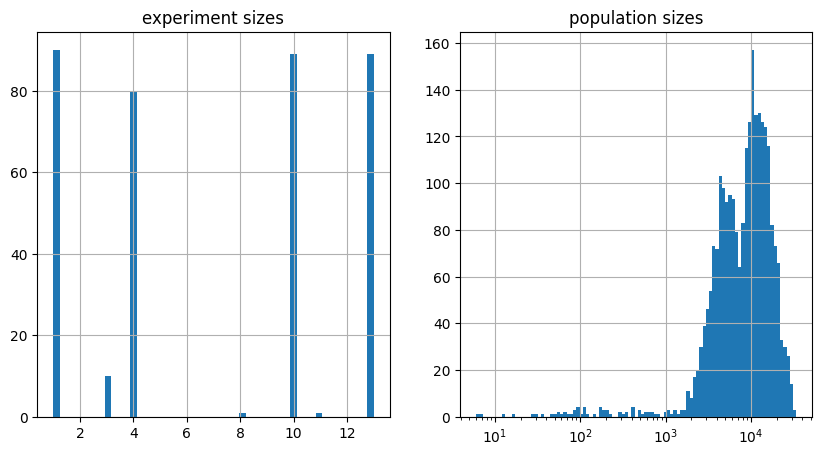

In [11]:
figsize(10,5)
plt.subplot(121)
plt.hist([len(d) for d in experiments], bins=50)
plt.title('experiment sizes')
plt.grid()
plt.subplot(122)
pops = []
for d in experiments:
  pops.extend(d)
pop_sizes = [len(d) for d in pops]
logbins = np.logspace(np.log10(min(pop_sizes)),np.log10(max(pop_sizes)),100)
plt.hist(pop_sizes, bins=logbins)
plt.xscale('log')
plt.title('population sizes')
plt.grid()

In [12]:
from copy import deepcopy

treat_set = set(['O', 'S', 'VS', 'L', 'V',  'F',  'C', 'SF', 'CS', 'CF', 'CSF'])
control_set = set(['DMSO', 'AH', 'H2O'])

def filter_experiment(input_e):
  e = deepcopy(input_e)
  # filter small populations
  treat_to_delete = []
  for treat in e.keys():
    pop_to_delete = []
    for concentration in e[treat].keys():
      if len(e[treat][concentration]) < 1000:
        pop_to_delete.append(concentration)
    for k in pop_to_delete:
      del e[treat][k]
    if len(e[treat]) == 0:
      treat_to_delete.append(treat)
  for k in treat_to_delete:
    del e[k]
  # filter treatment and control
  if (set(e.keys()) & treat_set) and (set(e.keys()) & control_set):
    return e
  return None

In [13]:
experiments = get_experiments(dict_data, 3)
experiments = [filter_experiment(e) for e in experiments]
experiments = list(filter(lambda e: e is not None, experiments))
print(len(experiments))
experiments = [get_dists(e) for e in experiments]
print(sum([len(d) for d in experiments]))

252
2244


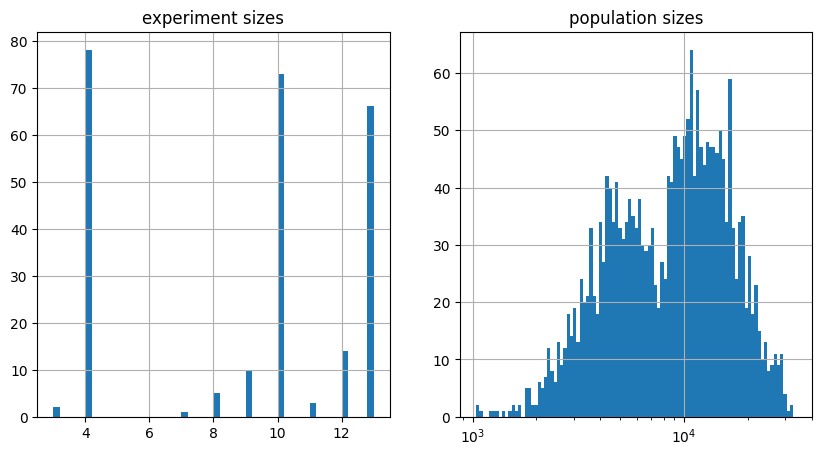

In [14]:
figsize(10,5)
plt.subplot(121)
plt.hist([len(d) for d in experiments], bins=50)
plt.title('experiment sizes')
plt.grid()
plt.subplot(122)
pops = []
for d in experiments:
  pops.extend(d)
pop_sizes = [len(d) for d in pops]
logbins = np.logspace(np.log10(min(pop_sizes)),np.log10(max(pop_sizes)),100)
plt.hist(pop_sizes, bins=logbins)
plt.xscale('log')
plt.title('population sizes')
plt.grid()

# Example of how to create Data splits (leave-out replicas)

In total, there are 252 experiments. We choose 30 of them for validation and 30 of them for test. For the same patient, culture, plate we have different replicas, and out of those we take 1 replica either for test or validation.

Some code is repeated later -- replica split generation code is later in this notebook.

In [15]:
replica_batches = get_experiments(dict_data, 2)
print(len(replica_batches))
sum([len(r) for r in replica_batches])

90


360

In [21]:
batches_culture = {'PDO': [],
                   'PDOF': [], 
                   'F': []}
for i in range(len(replica_batches)):
    b = replica_batches[i]
    for r in b.keys():
        control_list = list(set(b[r].keys()).intersection(control_set))
        if len(control_list) == 0:
            print('nan')
            continue
        culture = df.iloc[b[r][control_list[0]]['0'][0]]['Culture']
        print(culture)
    batches_culture[culture].append(i)
    print('-'*100)

PDO
PDO
PDO
----------------------------------------------------------------------------------------------------
PDO
PDO
PDO
PDO
PDO
PDO
----------------------------------------------------------------------------------------------------
PDO
PDO
PDO
----------------------------------------------------------------------------------------------------
PDO
PDO
PDO
----------------------------------------------------------------------------------------------------
PDO
PDO
PDO
PDO
PDO
PDO
----------------------------------------------------------------------------------------------------
PDO
PDO
PDO
----------------------------------------------------------------------------------------------------
PDO
PDO
PDO
----------------------------------------------------------------------------------------------------
PDO
PDO
PDO
PDO
PDO
PDO
----------------------------------------------------------------------------------------------------
PDO
PDO
PDO
------------------------------------------------

In [22]:
print(batches_culture)

{'PDO': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'PDOF': [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], 'F': [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]}


In [23]:
np.random.seed(1)
val_ids, test_ids = [], []
for culture in batches_culture.keys():
    ids = np.random.choice(batches_culture[culture], size=20, replace=False)
    val_ids.append(ids[:10])
    test_ids.append(ids[10:])
val_ids = np.concatenate(val_ids)
test_ids = np.concatenate(test_ids)

train_experiments = []
test_experiments = []
val_experiments = []
for i in range(len(replica_batches)):
  batch = []
  for r in replica_batches[i].keys():
    e = filter_experiment(replica_batches[i][r])
    if e is not None:
      batch.append(e)
  if len(batch) <= 1:
    print(len(batch), 'replicas left')
  pop_id = np.random.choice(len(batch))
  if i in val_ids:
    val_experiments.append(batch.pop(pop_id))
  if i in test_ids:
    test_experiments.append(batch.pop(pop_id))
  train_experiments.extend(batch)

In [24]:
print(val_ids)
print(test_ids)

[17 21 10 19 14 20 26  3 24 22 48 32 46 59 44 35 41 36 45 49 85 84 61 87
 89 65 88 83 63 66]
[23  4  2 25  6 18 13  7 27  1 40 33 51 38 55 42 54 31 37 50 68 81 70 74
 67 62 82 64 60 75]


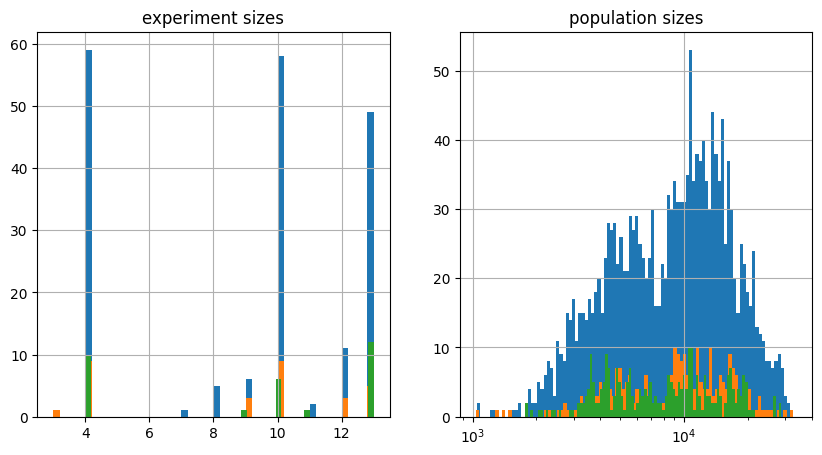

In [18]:
def plot_info(experiments):
  populations = [get_dists(e) for e in experiments]
  plt.subplot(121)
  plt.hist([len(d) for d in populations], bins=50)
  plt.title('experiment sizes')
  plt.grid()
  plt.subplot(122)
  flatten_pops = []
  for d in populations:
    flatten_pops.extend(d)
  pop_sizes = [len(d) for d in flatten_pops]
  logbins = np.logspace(np.log10(min(pop_sizes)),np.log10(max(pop_sizes)),100)
  plt.hist(pop_sizes, bins=logbins)
  plt.xscale('log')
  plt.title('population sizes')
  plt.grid()
  
plot_info(train_experiments)
plot_info(val_experiments)
plot_info(test_experiments)

In [19]:
features = ['pHH3', 'RFP', 'mCHERRY', 'Vimentin', 'EpCAM', 'CK18', 'Pan_CK', 
            'GFP', 'IdU', 'pPDK1', 'cCaspase_3', 'Geminin', 'pMEK1_2', 'pNDRG',
            'pMKK4_SEK1', 'pBTK', 'pSRC', 'p4EBP1', 'pRB', 'pAKT308', 'pCREB',
            'pSMAD1_5_9', 'pAKT473', 'pNF_kB', 'pMKK3_MKK6', 'pP38', 'pMAPKAPK',
            'pAMPKa', 'pBAD', 'pHistone_H2A', 'p90RSK', 'pP120_catenin',
            'Beta_catenin_active', 'pGSK', 'pERK1_2', 'pSMAD2_3', 'PLK', 'CHGA',
            'pDNAPK', 'pS6', 'CD90', 'cPARP', 'pCHK1', 'Cyclin_B1']

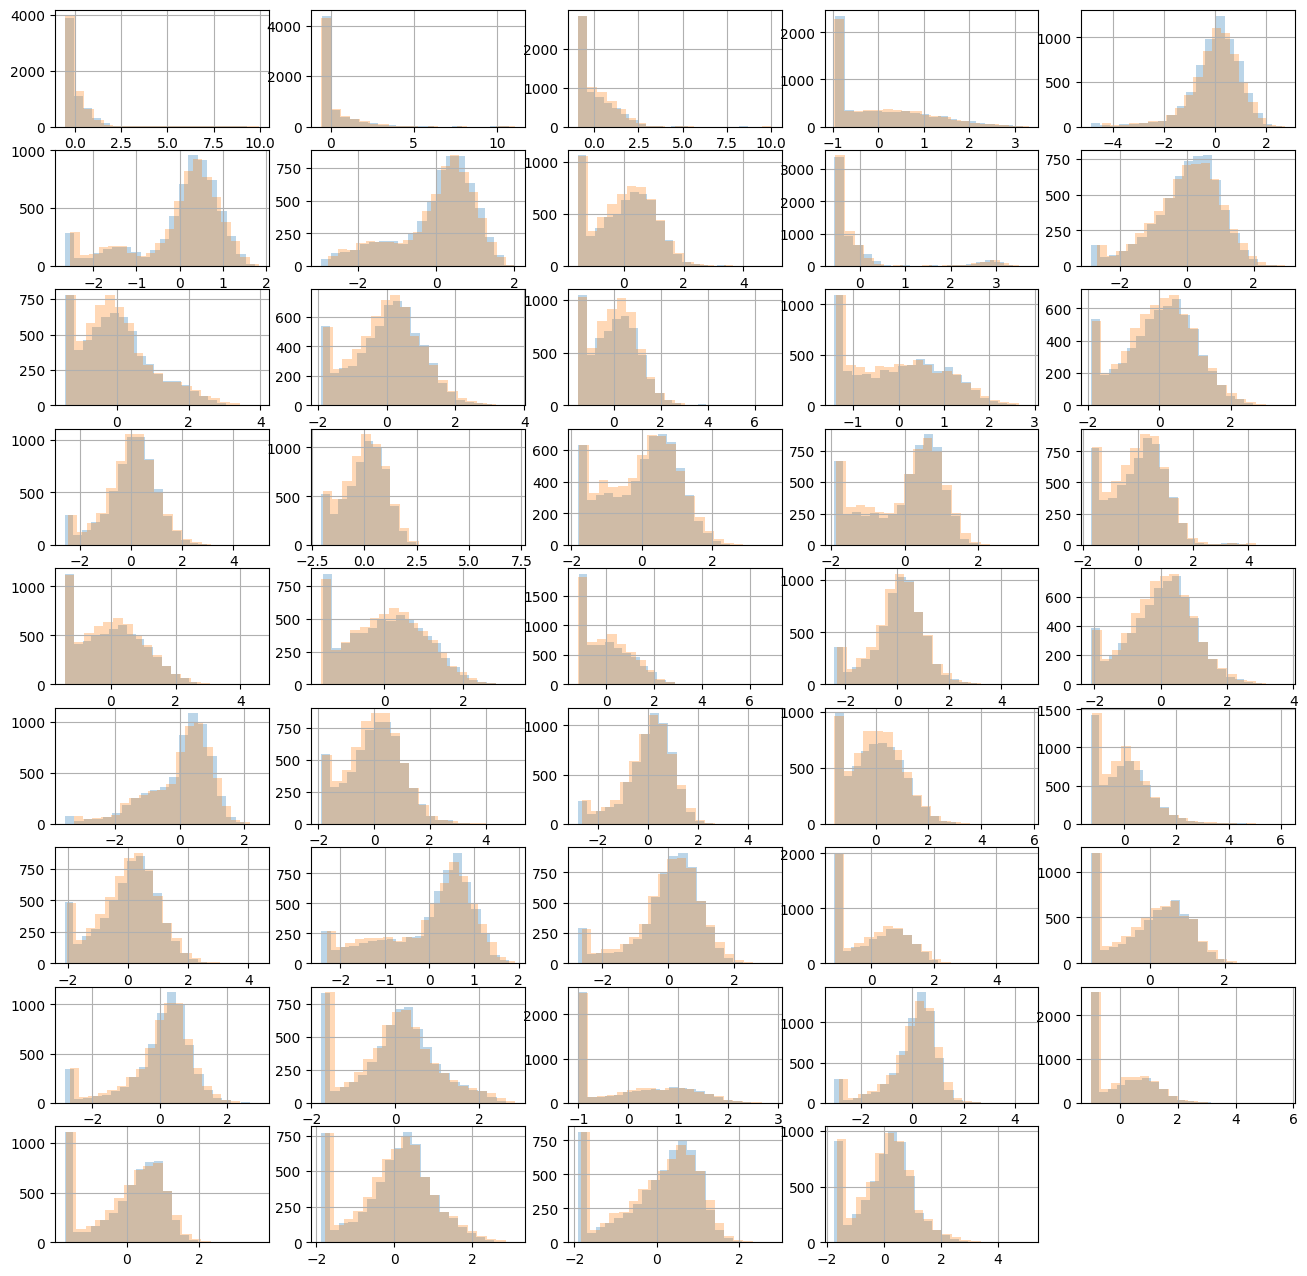

In [20]:
figsize(16,16)

exp = train_experiments[3]
x_0 = df.iloc[exp['DMSO']["0"]]
for i in range(len(features)):
    plt.subplot(9,5,i+1)
    vals = np.array(x_0[features[i]])
    vals = np.arcsinh(vals/5)
    vals -= vals.mean()
    vals /= vals.std()
    plt.hist(vals, bins=20, alpha=0.3)
    vals = np.array(x_0[features[i]])
    vals = np.log1p(vals/5)
    vals -= vals.mean()
    vals /= vals.std()
    plt.hist(vals, bins=20, alpha=0.3)
    plt.grid()

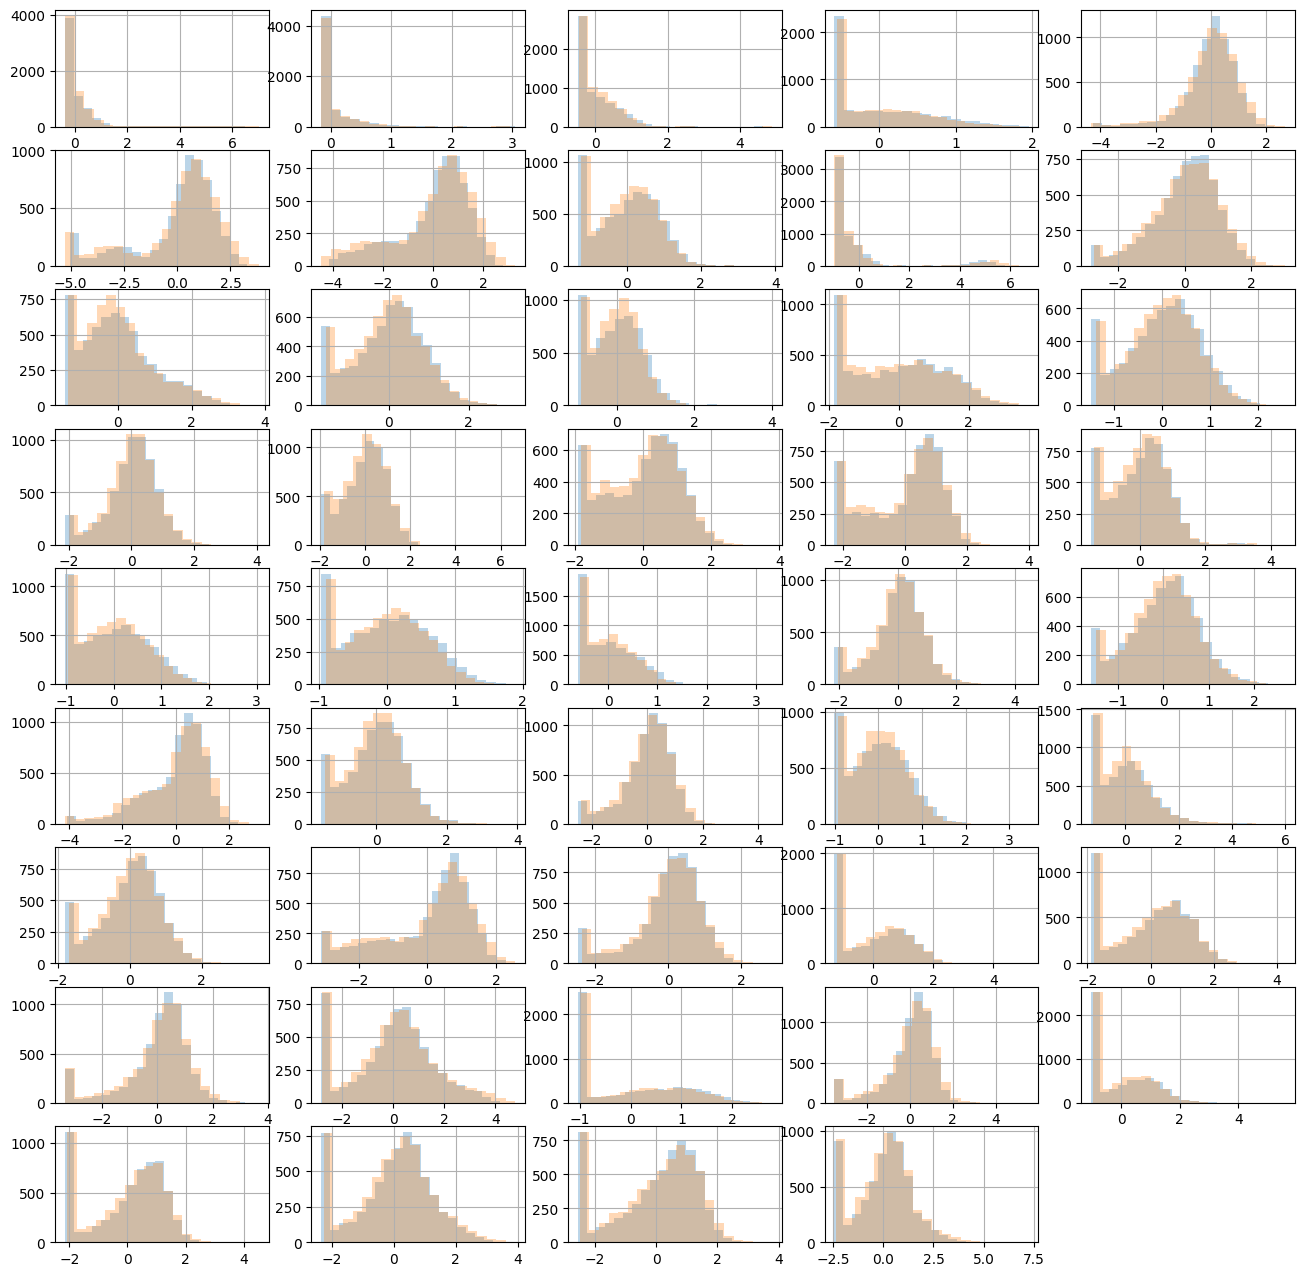

In [21]:
figsize(16, 16)

exp = train_experiments[3]
x_0 = df.iloc[exp["DMSO"]["0"]]

vals = np.array(x_0[features])
vals = np.arcsinh(vals / 5)
vals -= vals.mean(0, keepdims=True)
vals /= np.mean(vals.std(0))
for i in range(len(features)):
    plt.subplot(9, 5, i + 1)
    plt.hist(vals[:, i], bins=20, alpha=0.3)

vals = np.array(x_0[features])
vals = np.log1p(vals / 5)
vals -= vals.mean(0, keepdims=True)
vals /= np.mean(vals.std(0))
for i in range(len(features)):
    plt.subplot(9, 5, i + 1)
    plt.hist(vals[:, i], bins=20, alpha=0.3)
    plt.grid()

In [24]:
train_experiments[0]

{'O': {'2': array([   0,    1,    2, ..., 9182, 9183, 9184]),
  '3': array([24986, 24987, 24988, ..., 32993, 32994, 32995]),
  '1': array([167170, 167171, 167172, ..., 175671, 175672, 175673])},
 'H2O': {'0': array([2131036, 2131037, 2131038, ..., 2139513, 2139514, 2139515])}}

# Replicas-1 Split (equally left-out replicas from each patient)

In [25]:
def new_filter_experiment(input_e, replicate_num):
    e_pre = deepcopy(input_e)
    e = deepcopy(e_pre)

    cell_type_keys = ["PDOs", "Fibs"]

    # filter small populations
    treat_to_delete = []
    for treat in e_pre.keys():
        pop_to_delete = []
        for concentration in e_pre[treat].keys():
            if len(e_pre[treat][concentration]) < 1000:
                pop_to_delete.append(concentration)

            df_tmp = df.iloc[e_pre[treat][concentration]]

            culture = df_tmp.iloc[0]["Culture"]
            e[treat][concentration] = {culture: e_pre[treat][concentration]}

            e[treat][concentration][culture] = {c: None for c in cell_type_keys}

            num_pdos, num_fibs = 0, 0
            for cell_type in cell_type_keys:
                idcs = df_tmp.index[df_tmp["Cell_type"] == cell_type].tolist()

                e[treat][concentration][culture][cell_type] = (
                    np.array(idcs, dtype=int) if len(idcs) > 0 else None
                )

                if cell_type == "PDOs":
                    num_pdos += len(idcs)
                elif cell_type == "Fibs":
                    num_fibs += len(idcs)
                else:
                    print("Error in cell type")

        print(
            "Rep-batch:",
            i,
            "Cultue:",
            culture,
            "Treatment",
            treat,
            "Concentration",
            concentration,
            "Num PDO cells:",
            num_pdos,
            "Num Fibs cells:",
            num_fibs,
        )

        for k in pop_to_delete:
            del e[treat][k]
            if len(e[treat]) == 0:
                treat_to_delete.append(treat)

    for k in treat_to_delete:
        del e[k]

    # filter treatment and control
    if (set(e.keys()) & treat_set) and (set(e.keys()) & control_set):
        return e
    return None

In [26]:
np.random.seed(1)
val_ids, test_ids = [], []
for culture in batches_culture.keys():
    ids = np.random.choice(batches_culture[culture], size=20, replace=False)
    val_ids.append(ids[:10])
    test_ids.append(ids[10:])
val_ids = np.concatenate(val_ids)
test_ids = np.concatenate(test_ids)

train_experiments = []
test_experiments = []
val_experiments = []
for i in range(len(replica_batches)):
    batch = []
    for r in replica_batches[i].keys():
        e = new_filter_experiment(replica_batches[i][r], replicate_num=i)
        if e is not None:
            control_list = list(set(e.keys()).intersection(control_set))
            if len(control_list) == 0:
                print("nan")
                continue
            #get_culture_and_cell_type(e, control_list)
            batch.append(e)
    if len(batch) <= 1:
        print(len(batch), "replicas left")
    pop_id = np.random.choice(len(batch))
    if i in val_ids:
        val_experiments.append(batch.pop(pop_id))
    if i in test_ids:
        test_experiments.append(batch.pop(pop_id))
    train_experiments.extend(batch)

Rep-batch: 0 Cultue: PDO Treatment O Concentration 1 Num PDO cells: 8504 Num Fibs cells: 0
Rep-batch: 0 Cultue: PDO Treatment H2O Concentration 0 Num PDO cells: 8480 Num Fibs cells: 0
Rep-batch: 0 Cultue: PDO Treatment O Concentration 1 Num PDO cells: 9000 Num Fibs cells: 0
Rep-batch: 0 Cultue: PDO Treatment H2O Concentration 0 Num PDO cells: 8318 Num Fibs cells: 0
Rep-batch: 0 Cultue: PDO Treatment O Concentration 1 Num PDO cells: 8714 Num Fibs cells: 0
Rep-batch: 0 Cultue: PDO Treatment H2O Concentration 0 Num PDO cells: 8136 Num Fibs cells: 0
Rep-batch: 1 Cultue: PDO Treatment S Concentration 4 Num PDO cells: 4949 Num Fibs cells: 0
Rep-batch: 1 Cultue: PDO Treatment VS Concentration 4 Num PDO cells: 4430 Num Fibs cells: 0
Rep-batch: 1 Cultue: PDO Treatment L Concentration 4 Num PDO cells: 7102 Num Fibs cells: 0
Rep-batch: 1 Cultue: PDO Treatment V Concentration 1 Num PDO cells: 6495 Num Fibs cells: 0
Rep-batch: 1 Cultue: PDO Treatment DMSO Concentration 0 Num PDO cells: 5470 Num Fib

Rep-batch: 3 Cultue: PDO Treatment H2O Concentration 0 Num PDO cells: 12567 Num Fibs cells: 0
Rep-batch: 3 Cultue: PDO Treatment O Concentration 1 Num PDO cells: 10072 Num Fibs cells: 0
Rep-batch: 3 Cultue: PDO Treatment H2O Concentration 0 Num PDO cells: 10148 Num Fibs cells: 0
Rep-batch: 3 Cultue: PDO Treatment O Concentration 1 Num PDO cells: 9288 Num Fibs cells: 0
Rep-batch: 3 Cultue: PDO Treatment H2O Concentration 0 Num PDO cells: 11012 Num Fibs cells: 0
Rep-batch: 4 Cultue: PDO Treatment S Concentration 4 Num PDO cells: 5352 Num Fibs cells: 0
Rep-batch: 4 Cultue: PDO Treatment VS Concentration 4 Num PDO cells: 6849 Num Fibs cells: 0
Rep-batch: 4 Cultue: PDO Treatment L Concentration 4 Num PDO cells: 4735 Num Fibs cells: 0
Rep-batch: 4 Cultue: PDO Treatment V Concentration 1 Num PDO cells: 4150 Num Fibs cells: 0
Rep-batch: 4 Cultue: PDO Treatment DMSO Concentration 0 Num PDO cells: 3795 Num Fibs cells: 0
Rep-batch: 4 Cultue: PDO Treatment S Concentration 4 Num PDO cells: 5379 Num

In [ ]:
import pickle

with open(
    "data/data_splits_replicas_1.pickle", "wb"
) as handle:
    pickle.dump(
        {"train": train_experiments, "val": val_experiments, "test": test_experiments},
        handle,
        protocol=pickle.HIGHEST_PROTOCOL,
    )

In [ ]:
with open(
    "data/data_splits_replicas_1.pickle",
    "rb",
) as handle:
    data_splits = pickle.load(handle)

data_splits["train"][0]

{'O': {'2': {'PDO': {'PDOs': array([   0,    1,    2, ..., 9182, 9183, 9184]),
    'Fibs': None}},
  '3': {'PDO': {'PDOs': array([24986, 24987, 24988, ..., 32993, 32994, 32995]),
    'Fibs': None}},
  '1': {'PDO': {'PDOs': array([167170, 167171, 167172, ..., 175671, 175672, 175673]),
    'Fibs': None}}},
 'H2O': {'0': {'PDO': {'PDOs': array([2131036, 2131037, 2131038, ..., 2139513, 2139514, 2139515]),
    'Fibs': None}}}}

In [29]:
features = df.columns
conditions = [
    "Date",
    "Patient",
    "Culture",
    "Treatment",
    "Concentration",
    "Replicate",
    "Cell_type",
    "Plate",
    "Batch",
]
print(features)
print(len(features))

marker_cols = []
for f in features:
    if f in conditions:
        continue
    if f == "pPKCa": # drop b/c nans
        continue
    marker_cols.append(f)

print(marker_cols)
print(len(marker_cols))

Index(['pHH3', 'RFP', 'mCHERRY', 'Vimentin', 'EpCAM', 'CK18', 'Pan_CK', 'GFP',
       'IdU', 'pPDK1', 'cCaspase_3', 'Geminin', 'pMEK1_2', 'pNDRG',
       'pMKK4_SEK1', 'pBTK', 'pSRC', 'p4EBP1', 'pRB', 'pAKT308', 'pCREB',
       'pSMAD1_5_9', 'pAKT473', 'pNF_kB', 'pMKK3_MKK6', 'pP38', 'pMAPKAPK',
       'pAMPKa', 'pBAD', 'pHistone_H2A', 'p90RSK', 'pP120_catenin',
       'Beta_catenin_active', 'pGSK', 'pERK1_2', 'pSMAD2_3', 'PLK', 'CHGA',
       'pDNAPK', 'pS6', 'CD90', 'cPARP', 'pCHK1', 'Cyclin_B1', 'Date',
       'Patient', 'Culture', 'Treatment', 'Concentration', 'Replicate',
       'Cell_type', 'pPKCa', 'Plate', 'Batch'],
      dtype='object')
54
['pHH3', 'RFP', 'mCHERRY', 'Vimentin', 'EpCAM', 'CK18', 'Pan_CK', 'GFP', 'IdU', 'pPDK1', 'cCaspase_3', 'Geminin', 'pMEK1_2', 'pNDRG', 'pMKK4_SEK1', 'pBTK', 'pSRC', 'p4EBP1', 'pRB', 'pAKT308', 'pCREB', 'pSMAD1_5_9', 'pAKT473', 'pNF_kB', 'pMKK3_MKK6', 'pP38', 'pMAPKAPK', 'pAMPKa', 'pBAD', 'pHistone_H2A', 'p90RSK', 'pP120_catenin', 'Beta_cateni

In [30]:
data_to_norm = np.array(df[marker_cols].values)
print(data_to_norm)

[[1.44484627e+00 0.00000000e+00 0.00000000e+00 ... 1.88296829e+02
  5.28126373e+01 3.61664200e+01]
 [5.78394270e+00 5.62137887e-02 4.34517384e-01 ... 4.31224785e+01
  1.56797457e+01 7.03363113e+01]
 [1.16529655e+00 2.31236172e+00 3.57033521e-01 ... 2.92459686e+02
  3.91039886e+01 6.69027939e+01]
 ...
 [0.00000000e+00 2.51099691e-02 5.98175240e+00 ... 5.24205065e+00
  3.31141586e+01 1.12272156e+02]
 [1.07582264e+01 0.00000000e+00 7.71155024e+00 ... 2.03852253e+01
  4.51682167e+01 9.40149918e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.98212814e+00
  9.82693672e+00 3.13391228e+01]]


In [31]:
print(len(data_splits['train']))
print(len(data_to_norm))
print(np.min(data_to_norm), np.max(data_to_norm))
print(np.linalg.norm(data_to_norm))

192
24756030
0.0 786297.5
17851374.77755043


In [48]:
def OLD_normalize_raw_data(data):
    data = np.arcsinh(data / 5)
    mean = np.mean(data)
    std = np.std(data)
    data = data - mean
    data = data / std
    return data


def normalize_raw_data(data, split, mean=None, std=None):
    data = np.arcsinh(data / 5)
    if mean is None and std is None:
        mean = data.mean(0, keepdims=True)
        std = np.mean(data.std(0))
    data = data - mean
    data = data / std
    if split == "train":
        return data, mean, std
    else:
        return data

In [33]:
data_norm = deepcopy(data_to_norm)

for split in data_splits:
    idcs_split = []
    for s in data_splits[split]:
        treat = list(s.keys())
        for t in treat:
            conc = list(s[t].keys())
            for c in conc:
                cultures = list(s[t][c].keys())
                for culture in cultures:
                    cell_types = list(s[t][c][culture].keys())
                    # print(t, c, culture)
                    for cell_type in cell_types:
                        # print(cell_type)
                        if s[t][c][culture][cell_type] is not None:
                            # print(len(s[t][c][culture][cell_type]))
                            idcs_split.append(s[t][c][culture][cell_type])
    # print(idcs_split)
    idcs = np.concatenate(idcs_split)
    if split == "train": # should be the first split so this should be fine
        data_norm[idcs], mean_train, std_train = normalize_raw_data(data_to_norm[idcs], split)
    else:
        data_norm[idcs] = normalize_raw_data(data_to_norm[idcs], split, mean=mean_train, std=std_train)
    print(
        split,
        "num_idcs:",
        len(idcs),
        "norm of data:",
        np.linalg.norm(data_norm[idcs]),
        np.min(data_norm[idcs]),
        np.max(data_norm[idcs]),
    )

train num_idcs: 17588454 norm of data: 29226.769952702223 -3.736183649059433 8.619168711835966
val num_idcs: 2655368 norm of data: 11284.674919842922 -3.736183649059433 8.222708288265975
test num_idcs: 2555866 norm of data: 11092.086620790149 -3.736183649059433 8.314636681475871


In [ ]:
np.save("data/trellis_replicas_1_normalized.npy", data_norm)

# Replicas-2 Split (left-out replicas from 1 patient)

In [36]:
batches_culture = {"PDO": [], "PDOF": [], "F": []}
patients_culture = {
    "5": [],
    "11": [],
    "75": [],
    "141": [],
    "109": [],
    "27": [],
    "216": [],
    "99": [],
    "21": [],
    "23": [],
}

for i in range(len(replica_batches)):
    b = replica_batches[i]
    for r in b.keys():
        control_list = list(set(b[r].keys()).intersection(control_set))
        if len(control_list) == 0:
            print("nan")
            continue
        # culture = df.iloc[b[r][control_list[0]]["0"][0]]["Culture"]
        # print(culture)
        patient = df.iloc[b[r][control_list[0]]["0"][0]]["Patient"]
        print(patient)
    # batches_culture[culture].append(i)
    patients_culture[patient].append(i)
    print("-" * 100)

5
5
5
----------------------------------------------------------------------------------------------------
5
5
5
5
5
5
----------------------------------------------------------------------------------------------------
5
5
5
----------------------------------------------------------------------------------------------------
11
11
11
----------------------------------------------------------------------------------------------------
11
11
11
11
11
11
----------------------------------------------------------------------------------------------------
11
11
11
----------------------------------------------------------------------------------------------------
75
75
75
----------------------------------------------------------------------------------------------------
75
75
75
75
75
75
----------------------------------------------------------------------------------------------------
75
75
75
------------------------------------------------------------------------------------------------

In [37]:
print(patients_culture)

{'5': [0, 1, 2, 30, 31, 32, 60, 61, 62], '11': [3, 4, 5, 33, 34, 35, 63, 64, 65], '75': [6, 7, 8, 36, 37, 38, 66, 67, 68], '141': [9, 10, 11, 39, 40, 41, 69, 70, 71], '109': [12, 13, 14, 42, 43, 44, 72, 73, 74], '27': [15, 16, 17, 45, 46, 47, 75, 76, 77], '216': [18, 19, 20, 48, 49, 50, 78, 79, 80], '99': [21, 22, 23, 51, 52, 53, 81, 82, 83], '21': [24, 25, 26, 54, 55, 56, 84, 85, 86], '23': [27, 28, 29, 57, 58, 59, 87, 88, 89]}


In [38]:
np.random.seed(1)
val_ids, test_ids = [], []
for patient in patients_culture.keys():
    if patient == "27":
        print("Patient:", patient, "val ids:", patients_culture[patient])
        val_ids.append(patients_culture[patient])
    if patient == "21":
        print("Patient:", patient, "test ids:", patients_culture[patient])
        test_ids.append(patients_culture[patient])
val_ids = np.concatenate(val_ids)
test_ids = np.concatenate(test_ids)

Patient: 27 val ids: [15, 16, 17, 45, 46, 47, 75, 76, 77]
Patient: 21 test ids: [24, 25, 26, 54, 55, 56, 84, 85, 86]


In [39]:
# check every patient has F/PDO/PDOF culture
for i in range(len(replica_batches)):
    b = replica_batches[i]
    for r in b.keys():
        control_list = list(set(b[r].keys()).intersection(control_set))
        if len(control_list) == 0:
            print("nan")
            continue
        patient = df.iloc[b[r][control_list[0]]["0"][0]]["Patient"]
        culture = df.iloc[b[r][control_list[0]]["0"][0]]["Culture"]
        print(patient, culture)
    print("-" * 100)

5 PDO
5 PDO
5 PDO
----------------------------------------------------------------------------------------------------
5 PDO
5 PDO
5 PDO
5 PDO
5 PDO
5 PDO
----------------------------------------------------------------------------------------------------
5 PDO
5 PDO
5 PDO
----------------------------------------------------------------------------------------------------
11 PDO
11 PDO
11 PDO
----------------------------------------------------------------------------------------------------
11 PDO
11 PDO
11 PDO
11 PDO
11 PDO
11 PDO
----------------------------------------------------------------------------------------------------
11 PDO
11 PDO
11 PDO
----------------------------------------------------------------------------------------------------
75 PDO
75 PDO
75 PDO
----------------------------------------------------------------------------------------------------
75 PDO
75 PDO
75 PDO
75 PDO
75 PDO
75 PDO
--------------------------------------------------------------------------

In [40]:
def new_filter_experiment(input_e, replicate_num):
    e_pre = deepcopy(input_e)
    e = deepcopy(e_pre)

    cell_type_keys = ["PDOs", "Fibs"]

    # filter small populations
    treat_to_delete = []
    for treat in e_pre.keys():
        pop_to_delete = []
        for concentration in e_pre[treat].keys():
            if len(e_pre[treat][concentration]) < 1000:
                pop_to_delete.append(concentration)

            df_tmp = df.iloc[e_pre[treat][concentration]]

            culture = df_tmp.iloc[0]["Culture"]
            e[treat][concentration] = {culture: e_pre[treat][concentration]}

            e[treat][concentration][culture] = {c: None for c in cell_type_keys}

            num_pdos, num_fibs = 0, 0
            for cell_type in cell_type_keys:
                idcs = df_tmp.index[df_tmp["Cell_type"] == cell_type].tolist()

                e[treat][concentration][culture][cell_type] = (
                    np.array(idcs, dtype=int) if len(idcs) > 0 else None
                )

                if cell_type == "PDOs":
                    num_pdos += len(idcs)
                elif cell_type == "Fibs":
                    num_fibs += len(idcs)
                else:
                    print("Error in cell type")

        print(
            "Rep-batch:",
            i,
            "Cultue:",
            culture,
            "Treatment",
            treat,
            "Concentration",
            concentration,
            "Num PDO cells:",
            num_pdos,
            "Num Fibs cells:",
            num_fibs,
        )

        for k in pop_to_delete:
            del e[treat][k]
            if len(e[treat]) == 0:
                treat_to_delete.append(treat)

    for k in treat_to_delete:
        del e[k]

    # filter treatment and control
    if (set(e.keys()) & treat_set) and (set(e.keys()) & control_set):
        return e
    return None

In [41]:
train_experiments = []
test_experiments = []
val_experiments = []
for i in range(len(replica_batches)):
    batch = []
    for r in replica_batches[i].keys():
        e = new_filter_experiment(replica_batches[i][r], replicate_num=i)
        if e is not None:
            control_list = list(set(e.keys()).intersection(control_set))
            if len(control_list) == 0:
                print("nan")
                continue
            # get_culture_and_cell_type(e, control_list)
            batch.append(e)
    if len(batch) <= 1:
        print(len(batch), "replicas left")
    pop_id = np.random.choice(len(batch))
    if i in val_ids:
        val_experiments.append(batch.pop(pop_id))
    if i in test_ids:
        test_experiments.append(batch.pop(pop_id))
    train_experiments.extend(batch)

Rep-batch: 0 Cultue: PDO Treatment O Concentration 1 Num PDO cells: 8504 Num Fibs cells: 0
Rep-batch: 0 Cultue: PDO Treatment H2O Concentration 0 Num PDO cells: 8480 Num Fibs cells: 0
Rep-batch: 0 Cultue: PDO Treatment O Concentration 1 Num PDO cells: 9000 Num Fibs cells: 0
Rep-batch: 0 Cultue: PDO Treatment H2O Concentration 0 Num PDO cells: 8318 Num Fibs cells: 0
Rep-batch: 0 Cultue: PDO Treatment O Concentration 1 Num PDO cells: 8714 Num Fibs cells: 0
Rep-batch: 0 Cultue: PDO Treatment H2O Concentration 0 Num PDO cells: 8136 Num Fibs cells: 0
Rep-batch: 1 Cultue: PDO Treatment S Concentration 4 Num PDO cells: 4949 Num Fibs cells: 0
Rep-batch: 1 Cultue: PDO Treatment VS Concentration 4 Num PDO cells: 4430 Num Fibs cells: 0
Rep-batch: 1 Cultue: PDO Treatment L Concentration 4 Num PDO cells: 7102 Num Fibs cells: 0
Rep-batch: 1 Cultue: PDO Treatment V Concentration 1 Num PDO cells: 6495 Num Fibs cells: 0
Rep-batch: 1 Cultue: PDO Treatment DMSO Concentration 0 Num PDO cells: 5470 Num Fib

In [ ]:
import pickle

with open(
    "data/data_splits_replicas_2.pickle", "wb"
) as handle:
    pickle.dump(
        {"train": train_experiments, "val": val_experiments, "test": test_experiments},
        handle,
        protocol=pickle.HIGHEST_PROTOCOL,
    )

In [ ]:
with open(
    "data/data_splits_replicas_2.pickle",
    "rb",
) as handle:
    data_splits = pickle.load(handle)

data_splits["train"][0]

{'O': {'2': {'PDO': {'PDOs': array([   0,    1,    2, ..., 9182, 9183, 9184]),
    'Fibs': None}},
  '3': {'PDO': {'PDOs': array([24986, 24987, 24988, ..., 32993, 32994, 32995]),
    'Fibs': None}},
  '1': {'PDO': {'PDOs': array([167170, 167171, 167172, ..., 175671, 175672, 175673]),
    'Fibs': None}}},
 'H2O': {'0': {'PDO': {'PDOs': array([2131036, 2131037, 2131038, ..., 2139513, 2139514, 2139515]),
    'Fibs': None}}}}

In [44]:
features = df.columns
conditions = [
    "Date",
    "Patient",
    "Culture",
    "Treatment",
    "Concentration",
    "Replicate",
    "Cell_type",
    "Plate",
    "Batch",
]
print(features)
print(len(features))

marker_cols = []
for f in features:
    if f in conditions:
        continue
    if f == "pPKCa":  # drop b/c nans
        continue
    marker_cols.append(f)

print(marker_cols)
print(len(marker_cols))

Index(['pHH3', 'RFP', 'mCHERRY', 'Vimentin', 'EpCAM', 'CK18', 'Pan_CK', 'GFP',
       'IdU', 'pPDK1', 'cCaspase_3', 'Geminin', 'pMEK1_2', 'pNDRG',
       'pMKK4_SEK1', 'pBTK', 'pSRC', 'p4EBP1', 'pRB', 'pAKT308', 'pCREB',
       'pSMAD1_5_9', 'pAKT473', 'pNF_kB', 'pMKK3_MKK6', 'pP38', 'pMAPKAPK',
       'pAMPKa', 'pBAD', 'pHistone_H2A', 'p90RSK', 'pP120_catenin',
       'Beta_catenin_active', 'pGSK', 'pERK1_2', 'pSMAD2_3', 'PLK', 'CHGA',
       'pDNAPK', 'pS6', 'CD90', 'cPARP', 'pCHK1', 'Cyclin_B1', 'Date',
       'Patient', 'Culture', 'Treatment', 'Concentration', 'Replicate',
       'Cell_type', 'pPKCa', 'Plate', 'Batch'],
      dtype='object')
54
['pHH3', 'RFP', 'mCHERRY', 'Vimentin', 'EpCAM', 'CK18', 'Pan_CK', 'GFP', 'IdU', 'pPDK1', 'cCaspase_3', 'Geminin', 'pMEK1_2', 'pNDRG', 'pMKK4_SEK1', 'pBTK', 'pSRC', 'p4EBP1', 'pRB', 'pAKT308', 'pCREB', 'pSMAD1_5_9', 'pAKT473', 'pNF_kB', 'pMKK3_MKK6', 'pP38', 'pMAPKAPK', 'pAMPKa', 'pBAD', 'pHistone_H2A', 'p90RSK', 'pP120_catenin', 'Beta_cateni

In [45]:
data_to_norm = np.array(df[marker_cols].values)
print(data_to_norm)

[[1.44484627e+00 0.00000000e+00 0.00000000e+00 ... 1.88296829e+02
  5.28126373e+01 3.61664200e+01]
 [5.78394270e+00 5.62137887e-02 4.34517384e-01 ... 4.31224785e+01
  1.56797457e+01 7.03363113e+01]
 [1.16529655e+00 2.31236172e+00 3.57033521e-01 ... 2.92459686e+02
  3.91039886e+01 6.69027939e+01]
 ...
 [0.00000000e+00 2.51099691e-02 5.98175240e+00 ... 5.24205065e+00
  3.31141586e+01 1.12272156e+02]
 [1.07582264e+01 0.00000000e+00 7.71155024e+00 ... 2.03852253e+01
  4.51682167e+01 9.40149918e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.98212814e+00
  9.82693672e+00 3.13391228e+01]]


In [46]:
print(len(data_splits["train"]))
print(len(data_to_norm))
print(np.min(data_to_norm), np.max(data_to_norm))
print(np.linalg.norm(data_to_norm))

234
24756030
0.0 786297.5
17851374.77755043


In [49]:
data_norm = deepcopy(data_to_norm)

for split in data_splits:
    idcs_split = []
    for s in data_splits[split]:
        treat = list(s.keys())
        for t in treat:
            conc = list(s[t].keys())
            for c in conc:
                cultures = list(s[t][c].keys())
                for culture in cultures:
                    cell_types = list(s[t][c][culture].keys())
                    # print(t, c, culture)
                    for cell_type in cell_types:
                        # print(cell_type)
                        if s[t][c][culture][cell_type] is not None:
                            # print(len(s[t][c][culture][cell_type]))
                            idcs_split.append(s[t][c][culture][cell_type])
    # print(idcs_split)
    idcs = np.concatenate(idcs_split)
    if split == "train":  # should be the first split so this should be fine
        data_norm[idcs], mean_train, std_train = normalize_raw_data(
            data_to_norm[idcs], split
        )
    else:
        data_norm[idcs] = normalize_raw_data(
            data_to_norm[idcs], split, mean=mean_train, std=std_train
        )
    print(
        split,
        "num_idcs:",
        len(idcs),
        "norm of data:",
        np.linalg.norm(data_norm[idcs]),
        np.min(data_norm[idcs]),
        np.max(data_norm[idcs]),
    )

train num_idcs: 21600062 norm of data: 32366.441490521018 -3.7555853194921287 8.629387836071253
val num_idcs: 668137 norm of data: 6136.675642876171 -3.7555853194921287 7.326092336548472
test num_idcs: 531489 norm of data: 5108.36268584336 -3.7555853194921287 8.519256788712948


In [ ]:
np.save("data/trellis_replicas_2_normalized.npy", data_norm)